In [8]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [12]:
da=xr.open_dataset('/data/aero/observations/DAOD_MODIS/DAOD_monthly_MODIS.nc')

In [13]:
da

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 216)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) float64 7.309e+05 7.309e+05 ... 7.374e+05 7.374e+05
Data variables:
    daod     (time, lat, lon) float32 ...

In [14]:
da.lat.attrs.update(long_name='latitude', units = "degrees_north", axis = "Y", standard_name = "latitude")
da.lon.attrs.update(long_name='longitude', units = "degrees_east", axis = "X", standard_name = "longitude")
da=da.assign_coords(time=pd.to_datetime(da.time.data-730852,unit='D',origin='2001-01-01'))
da.time.attrs.update(long_name='time', axis = "T", standard_name = "time")
da.daod.attrs.update(long_name='Monthly mean DAOD derrived from MODIS TERRA', units = "NoUnits", standard_name = "DAOD550")

In [16]:
da.to_netcdf(path='/data/aero/observations/DAOD_MODIS/DAOD_monthly_MODIS_postprocessed.nc', mode='w')

<ipython-input-15-f8f0e701ac57>:7: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cs, shrink=0.2, extend='min')


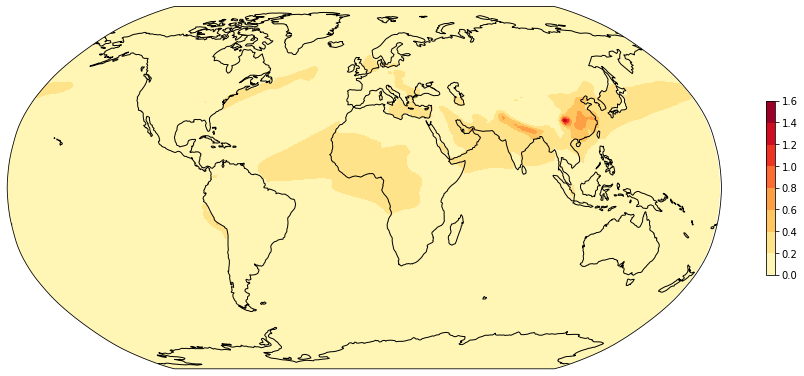

In [15]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson())
cs=ax.contourf(tai.longitude.values,tai.latitude.values,tai.mean('time').od550aer,
               #levels=[-0.05,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.05,],
               #vmin=-0.45, vmax=0.45,
               transform=ccrs.PlateCarree(), cmap='YlOrRd')#,norm=MidpointNormalize(midpoint=0))
plt.colorbar(cs, shrink=0.2, extend='min')
ax.set_global()
ax.coastlines()

In [8]:
#%matplotlib widget
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson())
cs=ax.contourf(tai.longitude.values,tai.latitude.values,tai.mean('time').od550aer,
               #levels=[-0.05,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.05,],
               #vmin=-0.45, vmax=0.45,
               transform=ccrs.PlateCarree(), cmap='YlOrRd')#,norm=MidpointNormalize(midpoint=0))
plt.colorbar(cs, shrink=0.5, extend='min')
ax.set_global()
ax.coastlines()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-8-71ab86cb5979>:8: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cs, shrink=0.5, extend='min')


In [5]:
tai.od550aer.where(tai.od550aer>10)

<xarray.DataArray 'od550aer' (time: 360, latitude: 181, longitude: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) object 1985-01-16 12:00:00 ... 2014-12-16 12:00:00
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
Attributes:
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol_parti...
    long_name:      Ambient Aerosol Optical Thickness at 550nm
    units:          1
    comment:        AOD from the ambient aerosols (i.e., includes aerosol wat...
    original_name:  AODVIS
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-15T05:27:23Z altered by CMOR: Treated scalar dime...

In [25]:
np.sum(np.isnan(tai.od550aer.values))

0

In [26]:
tai.od550aer.values[(np.where(tai.od550aer.values>10))]

array([11.109534, 12.83136 , 10.362608, 10.033183, 11.996601],
      dtype=float32)

In [22]:
np.shape(tai.od550aer.values)

(360, 181, 360)

In [7]:
import glob
a=glob.glob('/data/aero/mapped_data/CMIP6/historical/od550aer*_r*.nc')
a

['/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_AWI-ESM-1-1-LR_historical_r1i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_BCC-ESM1_historical_r1i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_CESM2-FV2_historical_r1i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_CESM2_historical_r10i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_CNRM-ESM2-1_historical_r1i1p1f2_gr_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_E3SM-1-0_historical_r1i1p1f1_gr_1985-2014_mapped.nc',
 '/data/aero/mapped_data/CMIP6/historical/od550aer_AERmon_E3SM-1-1_historical_r1i1p1f1_g

In [27]:
#for x in a:
#    print('mv '+x+' '+x.replace('historical/','historical/setvrange/'))
#    print('cdo setvrange,-1,100 '+x.replace('historical/','historical/setvrange/')+' '+x)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds
    
class Container(object): 
    def __init__(self, target_stats1, target_stats2, taylor_stats1, taylor_stats2):
        self.target_stats1 = target_stats1
        self.target_stats2 = target_stats2
        self.taylor_stats1 = taylor_stats1
        self.taylor_stats2 = taylor_stats2

if __name__ == '__main__':

    # Set the figure properties (optional)
    rcParams["figure.figsize"] = [6.0, 4.8]
    rcParams['lines.linewidth'] = 1 # line width for plots
    rcParams.update({'font.size': 12}) # font size of axes text
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
    
    # Read Taylor statistics for ERA Interim (stats1) and TRMM (stats2) 
    # data with respect to APHRODITE observations for each of years 2001 to 
    # 2014 from pickle file
    stats = load_obj('Mekong_Basin_data') # observations

    # Specify labels for points in a dictionary because only desire labels
    # for each data set.
    label = {'ERA-5': 'r', 'TRMM': 'b'}
    
    '''
    Produce the Taylor diagram for the first dataset
    '''
    sm.taylor_diagram(stats.taylor_stats1['sdev'], 
                      stats.taylor_stats1['crmsd'], 
                      stats.taylor_stats1['ccoef'], markercolor ='r', alpha = 0.0)

    '''
    Overlay the second dataset
    '''
    sm.taylor_diagram(stats.taylor_stats2['sdev'], 
                      stats.taylor_stats2['crmsd'], 
                      stats.taylor_stats2['ccoef'], markercolor ='b', alpha = 0.0,
                      overlay = 'on', markerLabel = label)

    # Write plot to file
    plt.savefig('taylor12.png',dpi=150,facecolor='w', bbox_inches='tight')

    # Show plot
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
stats.taylor_stats1['sdev']

array([0.80796409, 0.7313929 , 1.04894074, 0.97810879, 0.87847156,
       1.06006125, 0.82095192, 0.89393603, 0.80694747, 0.83717871,
       0.98701521, 1.00742865, 0.9524007 , 0.86863236, 0.83737923])

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN,20200310
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190718
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190809
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127


In [3]:
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
14833,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AS-RCEC/TaiESM1/historical/r1i...,NaN,20200623
15059,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20200720
15129,CMIP,AWI,AWI-CM-1-1-MR,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20200720
15196,CMIP,AWI,AWI-CM-1-1-MR,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20200720
15266,CMIP,AWI,AWI-CM-1-1-MR,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/AWI/AWI-CM-1-1-MR/historical/r...,NaN,20200720
...,...,...,...,...,...,...,...,...,...,...,...
114238,CMIP,THU,CIESM,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r1i1p1f1/...,NaN,20200417
114291,CMIP,THU,CIESM,historical,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r2i1p1f1/...,NaN,20200417
114340,CMIP,THU,CIESM,historical,r3i1p1f1,Amon,tas,gr,gs://cmip6/CMIP/THU/CIESM/historical/r3i1p1f1/...,NaN,20200417
114499,CMIP,UA,MCM-UA-1-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/UA/MCM-UA-1-0/historical/r1i1p...,NaN,20190731


In [4]:
df_ta_ncar = df_ta.query('institution_id == "NCAR"')
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
91877,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r1i1...,NaN,20191120
92307,CMIP,NCAR,CESM2-FV2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r2i1...,NaN,20200226
92473,CMIP,NCAR,CESM2-FV2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r3i1...,NaN,20200226
93509,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20191120
93911,CMIP,NCAR,CESM2-WACCM-FV2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
94080,CMIP,NCAR,CESM2-WACCM-FV2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
95298,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN,20190227
95772,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r2...,NaN,20190227
96156,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r3...,NaN,20190227
98041,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN,20190313


In [5]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_ncar.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

gs://cmip6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Amon/tas/gn/


<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T10:42:54Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/4b164514-1627-4deb-a8d5-93d4c5166d41...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

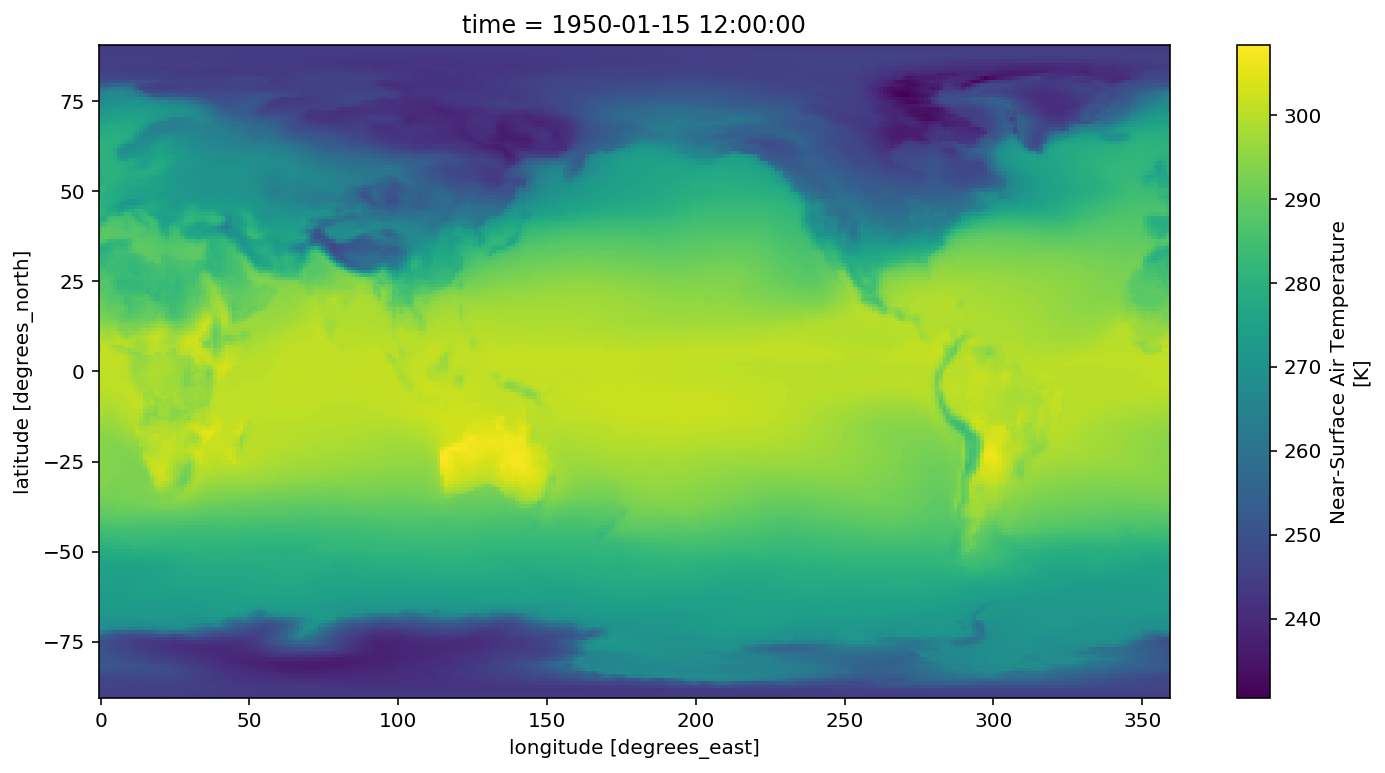

In [6]:
ds.tas.sel(time='1950-01').squeeze().plot()

In [2]:
import glob

In [26]:
glob.glob('/data/aero/CMIP6/DECK/historical/ua/*remapped.nc')

['/data/aero/CMIP6/DECK/historical/ua/ua_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_1985-2014_remapped.nc',
 '/data/aero/CMIP6/DECK/historical/ua/ua_AERmon_TaiESM1_historical_r1i1p1f1_gn_1985-2014_remapped.nc']

In [37]:
glob.glob('/work/rscheele/CMIP6_202012/DECK/historical/wind/*ensmean*.nc')

['/work/rscheele/CMIP6_202012/DECK/historical/wind/wind_Amon_CMIP6_historical_ensmean_g_1985-2014.nc']

In [38]:
ens=xr.open_mfdataset(glob.glob('/work/rscheele/CMIP6_202012/DECK/historical/wind/*ensmean*.nc'))

In [40]:
tmp1_ua = xr.open_dataset('/data/aero/CMIP6/DECK/historical/ua/ua_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_1985-2014_remapped.nc', drop_variables=['lev','lev_bnds','p0','a','b','a_bnds','b_bnds','ps'])
tmp1_va = xr.open_dataset('/data/aero/CMIP6/DECK/historical/va/va_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_1985-2014_remapped.nc', drop_variables=['lev','lev_bnds','p0','a','b','a_bnds','b_bnds','ps'])
tmp1_wind= np.sqrt(tmp1_ua.rename(ua='wind')**2+tmp1_va.rename(va='wind')**2)

tmp2_ua = xr.open_dataset('/data/aero/CMIP6/DECK/historical/ua/ua_AERmon_TaiESM1_historical_r1i1p1f1_gn_1985-2014_remapped.nc', drop_variables=['lev','lev_bnds','p0','a','b','a_bnds','b_bnds','ps'])
tmp2_va = xr.open_dataset('/data/aero/CMIP6/DECK/historical/va/va_AERmon_TaiESM1_historical_r1i1p1f1_gn_1985-2014_remapped.nc', drop_variables=['lev','lev_bnds','p0','a','b','a_bnds','b_bnds','ps'])
tmp2_wind= np.sqrt(tmp2_ua.rename(ua='wind')**2+tmp2_va.rename(va='wind')**2)

tmp3_wind = xr.open_dataset('/work/rscheele/CMIP6_202012/DECK/historical/wind/wind_Amon_BCC-ESM1_historical_runmean_gn_1985-2014_remapped.nc')

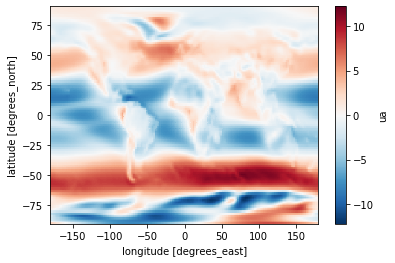

In [28]:
tmp.mean('time').ua.plot()

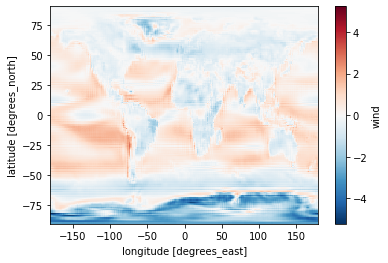

In [55]:
(ens.mean('time').wind-tmp1_wind.mean('time').wind*0.8).plot()

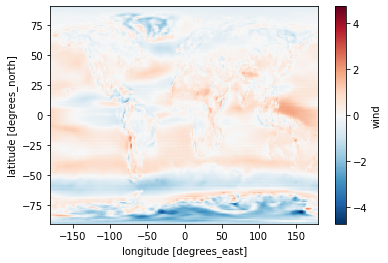

In [56]:
(ens.mean('time').wind-tmp2_wind.mean('time').wind*0.8).plot()

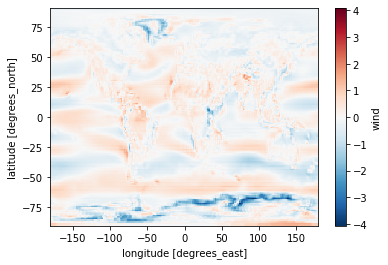

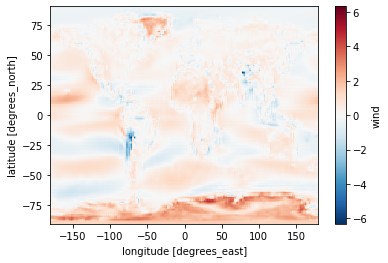

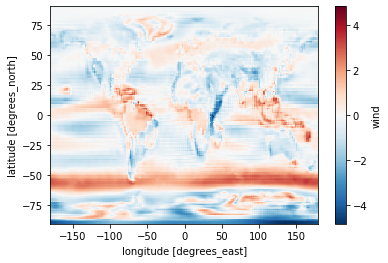

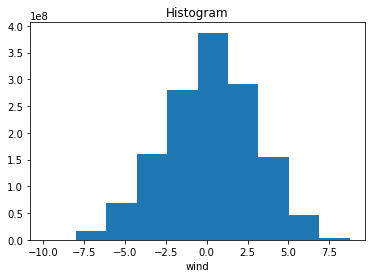

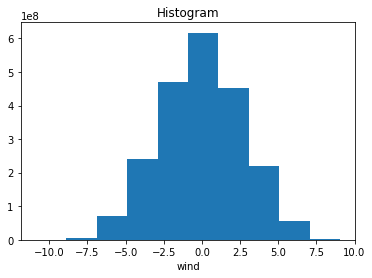

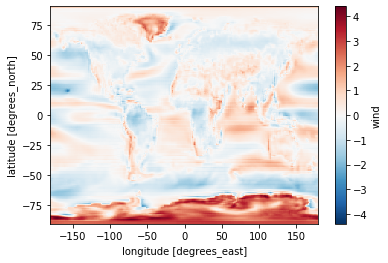

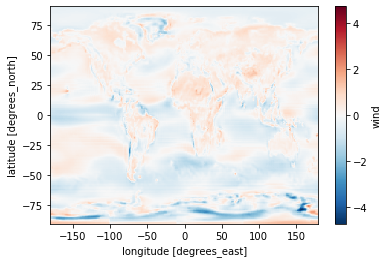

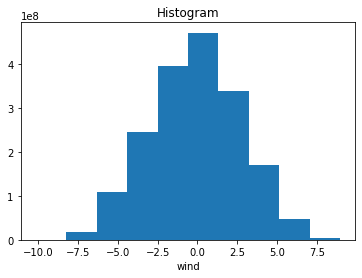

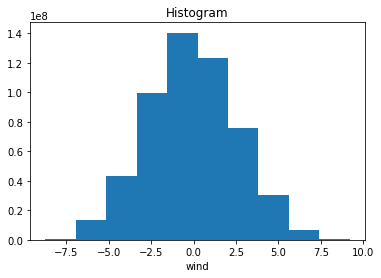

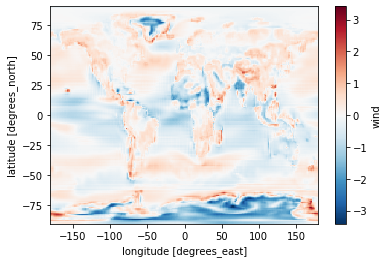

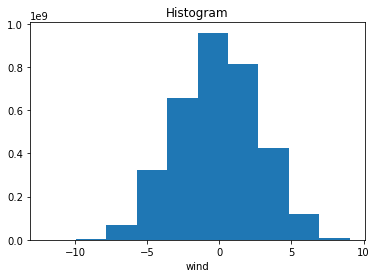

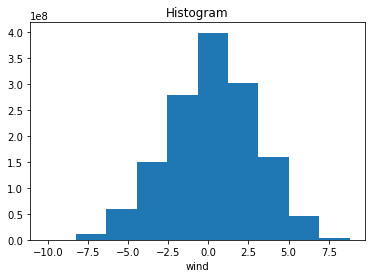

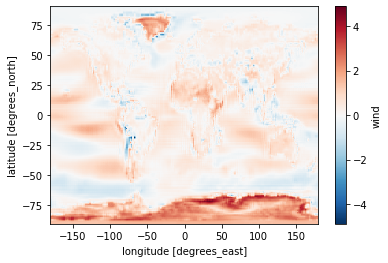

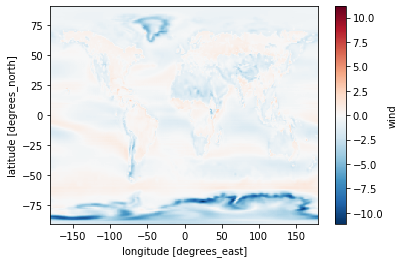

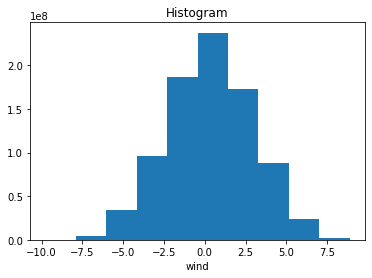

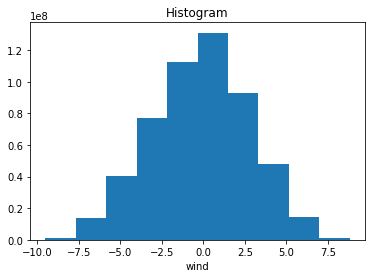

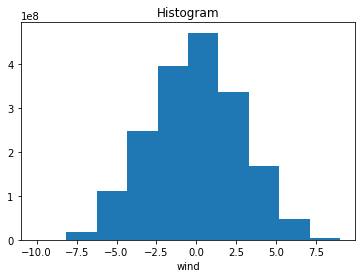

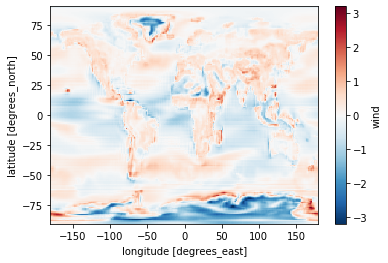

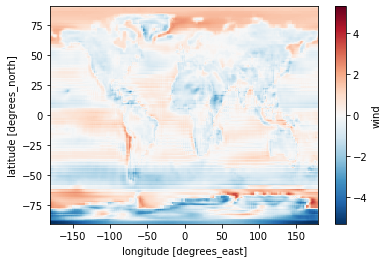

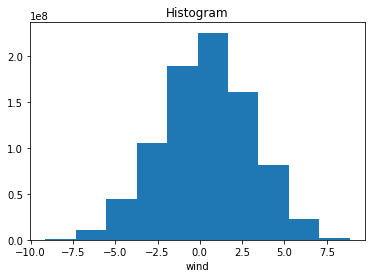

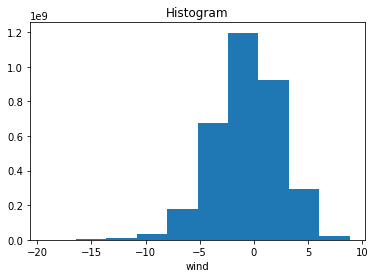

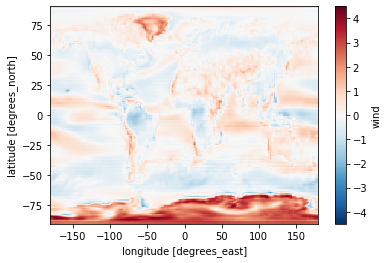

In [57]:
for files in glob.glob('/work/rscheele/CMIP6_202012/DECK/historical/wind/*runmean*.nc'):
    tmp3_wind = xr.open_dataset(files)
    (ens.mean('time').wind-tmp3_wind.mean('time').wind).plot()
    plt.show()

In [10]:
tmp=xr.open_dataset("/work/rscheele/rsdscs_EC_day/rsdscs_3hr_EC-Earth3-AerChem_historical_r1i1p1f1_gr_198501010130-198512312230.nc")

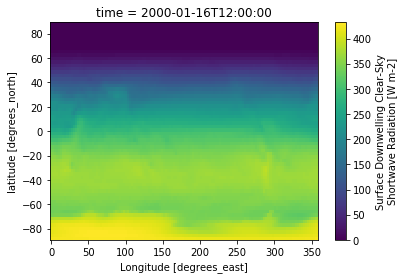

In [83]:
tmp2=xr.open_dataset("/data/aero/CMIP6/DECK/historical/rsdscs/rsdscs_Amon_BCC-ESM1_historical_r1i1p1f1_gn_1985-2014.nc")
tmp2.rsdscs.sel(time="2000-01").plot()

In [30]:
import glob
glob.glob("/work/rscheele/CMIP6/*/historical/rsdscs/*ensmean*")
#import os
#for fil in glob.glob("/work/rscheele/CMIP6/*/historical/rsdscs/*ensmean*"):
#    os.system("rm "+fil)

In [5]:
xr.open_dataset('/work/rscheele/CMIP6/DECK/historical/od550dust/od550dust_AERmon_CMIP6_historical_ensstdDJFmean_g_1985-2014.nc')

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 181, longitude: 360, time: 1)
Coordinates:
  * time       (time) object 2000-01-01 00:00:00
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    od550dust  (time, latitude, longitude) float32 ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.9rc1 ...
    Conventions:                     CF-1.7 CMIP-6.0 UGRID-1.0
    history:                         Wed Jan 20 10:53:07 2021: cdo ensstd -ti...
    source:                          GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cu...
    institution:                     National Oceanic and Atmospheric Adminis...
    external_variables:              areacella
    table_id:                        AERmon
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           36500.0
    comment:                         <null ref>
    contact:                         gfdl.climate.model.info@noaa.gov
    creation_date:                   2019-08-06T03:42:54Z
    data_specs_version:              01.00.27
    experiment:                      all-forcing simulation of the recent past
    experiment_id:                   historical
    forcing_index:                   1
    frequency:                       mon
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.NOA...
    grid:                            atmos data regridded from Cubed-sphere (...
    grid_label:                      gr1
    initialization_index:            1
    institution_id:                  NOAA-GFDL
    license:                         CMIP6 model data produced by NOAA-GFDL i...
    mip_era:                         CMIP6
    nominal_resolution:              100 km
    parent_activity_id:              CMIP
    parent_experiment_id:            piControl
    parent_mip_era:                  CMIP6
    parent_source_id:                GFDL-ESM4
    parent_time_units:               days since 0001-1-1
    parent_variant_label:            r1i1p1f1
    physics_index:                   1
    product:                         model-output
    realization_index:               1
    realm:                           aerosol
    source_id:                       GFDL-ESM4
    source_type:                     AOGCM AER CHEM BGC
    sub_experiment:                  none
    sub_experiment_id:               none
    title:                           NOAA GFDL GFDL-ESM4 model output prepare...
    tracking_id:                     hdl:21.14100/d66c0c04-0f5b-4b67-ada3-cf8...
    variable_id:                     od550dust
    variant_info:                    N/A
    references:                      see further_info_url attribute
    variant_label:                   r1i1p1f1
    DODS_EXTRA.Unlimited_Dimension:  time
    download_history:                Downloaded on 2020-10-07 at: \nhttp://es...
    CDO:                             Climate Data Operators version 1.9.9rc1 ...

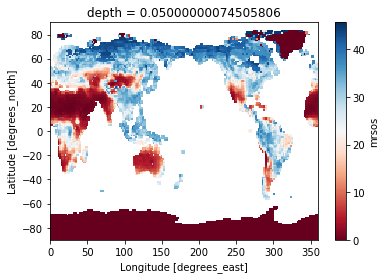

In [16]:
xr.open_dataset('/data/aero/CMIP6/DECK/historical/mrsos/mrsos_Lmon_UKESM1-0-LL_historical_r10i1p1f2_gn_1985-2014.nc').mean('time').mrsos.plot(cmap='RdBu')

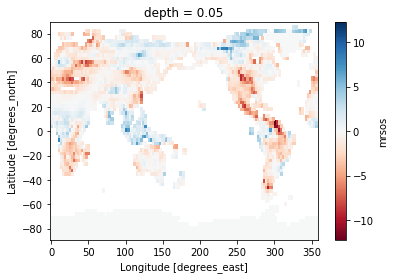

In [19]:
(xr.open_dataset('/data/aero/CMIP6/ScenarioMIP/ssp585/mrsos/mrsos_Lmon_MIROC-ES2L_ssp585_r10i1p1f2_gn_2015-2100.nc').sel(time=slice('2071','2100')).mean('time')-xr.open_dataset('/data/aero/CMIP6/DECK/historical/mrsos/mrsos_Lmon_MIROC-ES2L_historical_r9i1p1f2_gn_1985-2014.nc').sel(time=slice('1985','2014')).mean('time')).mrsos.plot(cmap='RdBu')

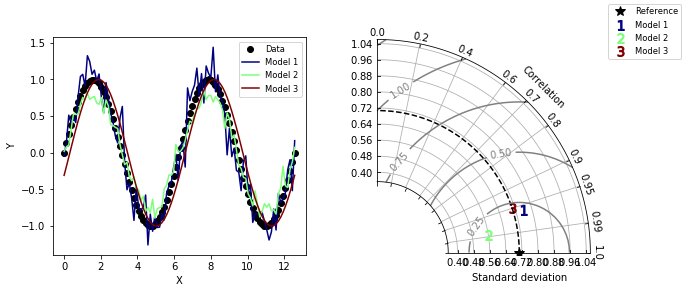

In [2]:
#!/usr/bin/env python
# Copyright: This document has been placed in the public domain.

"""
Taylor diagram (Taylor, 2001) implementation.
Note: If you have found these software useful for your research, I would
appreciate an acknowledgment.
"""

__version__ = "Time-stamp: <2018-12-06 11:43:41 ycopin>"
__author__ = "Yannick Copin <yannick.copin@laposte.net>"

import numpy as NP
import matplotlib.pyplot as PLT


class TaylorDiagram(object):
    """
    Taylor diagram.
    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.5), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.
        Parameters:
        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l

    def add_grid(self, *args, **kwargs):
        """Add a grid."""

        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours


def test1():
    """Display a Taylor diagram in a separate axis."""

    # Reference dataset
    x = NP.linspace(0, 4*NP.pi, 100)
    data = NP.sin(x)
    refstd = data.std(ddof=1)           # Reference standard deviation

    # Generate models
    m1 = data + 0.2*NP.random.randn(len(x))     # Model 1
    m2 = 0.8*data + .1*NP.random.randn(len(x))  # Model 2
    m3 = NP.sin(x-NP.pi/10)                     # Model 3

    # Compute stddev and correlation coefficient of models
    samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0, 1]]
                         for m in (m1, m2, m3)])

    fig = PLT.figure(figsize=(10, 4))

    # Taylor diagram
    dia = TaylorDiagram(refstd, fig=fig, rect=122, label="Reference",
                        srange=(0.5, 1.5))

    colors = PLT.matplotlib.cm.jet(NP.linspace(0, 1, len(samples)))



    # Add the models to Taylor diagram
    for i, (stddev, corrcoef) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       marker='$%d$' % (i+1), ms=10, ls='',
                       mfc=colors[i], mec=colors[i],
                       label="Model %d" % (i+1))

    # Add grid
    dia.add_grid()

    # Add RMS contours, and label them
    contours = dia.add_contours(colors='0.5')
    PLT.clabel(contours, inline=1, fontsize=10, fmt='%.2f')

    # Add a figure legend
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='small'), loc='upper right')

    return dia


dia = test2()


In [3]:
# Reference dataset
x = NP.linspace(0, 4*NP.pi, 100)
data = NP.sin(x)
refstd = data.std(ddof=1)           # Reference standard deviation

# Generate models
m1 = data + 0.2*NP.random.randn(len(x))     # Model 1
m2 = 0.8*data + .1*NP.random.randn(len(x))  # Model 2
m3 = NP.sin(x-NP.pi/10)                     # Model 3

# Compute stddev and correlation coefficient of models
samples = NP.array([ [m.std(ddof=1), NP.corrcoef(data, m)[0, 1]]
                     for m in (m1, m2, m3)])

In [6]:
(m1, m2, m3)

(array([-0.04314888,  0.3306597 , -0.0483579 ,  0.3544507 ,  0.54609032,
         0.6745712 ,  0.6554908 ,  0.85189067,  0.50182965,  0.99948377,
         1.03601719,  1.03023146,  1.26418001,  0.74149492,  0.76186834,
         0.70718464,  0.94101027,  0.85194054,  0.58461834,  0.91205449,
         0.30987758,  0.24468631,  0.27814766,  0.14548774,  0.20838571,
        -0.25941772, -0.05985996, -0.16021554, -0.21713768, -0.91105711,
        -0.44668096, -0.64287157, -0.87660905, -0.87200543, -1.00645413,
        -0.78768303, -1.20540512, -1.01941036, -1.24901799, -1.03030316,
        -1.18072465, -1.10997855, -0.89940173, -0.77990263, -0.83974209,
        -0.69450186, -0.4478237 , -0.33169175, -0.00548101, -0.27740504,
        -0.03733819,  0.26575725,  0.60604068,  0.64477675,  0.69137582,
         0.56249334,  0.70309155,  1.19477007,  0.75542509,  0.92226846,
         0.91617892,  0.89286765,  1.10143237,  0.88747811,  1.05003889,
         1.04119025,  0.89042311,  0.51729989,  0.4

In [26]:
MERRA = xr.open_mfdataset(['/data/aero/Reanalysis/MERRA-2/MERRA2_aer_1980-2019_remapped.nc4','/data/aero/Reanalysis/MERRA-2/MERRA2_aer_202001-202005_remapped.nc4'])
# change time to datetime64
if np.dtype(MERRA.time[0])=='object':
    MERRA=MERRA.assign_coords(time=pd.to_datetime([str(x) for x in MERRA.time.values]))
if np.dtype(MERRA.time[0])=='float64':
    MERRA=MERRA.assign_coords(time=pd.to_datetime([str(x)[:4]+'-'+str(x)[4:6]+'-'+str(15) for x in MERRA.time.values]))
try:
    MERRA=MERRA.rename(latitude='lat')
    MERRA=MERRA.rename(longitude='lon')
except:
    try:
        MERRA=MERRA.rename(Latitude='lat')
        MERRA=MERRA.rename(Longitude='lon')
    except:
        pass
MERRA=MERRA.sortby('lat')
MERRA=MERRA.sortby('lon')

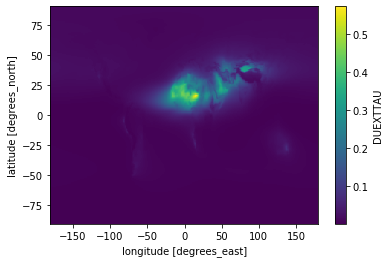

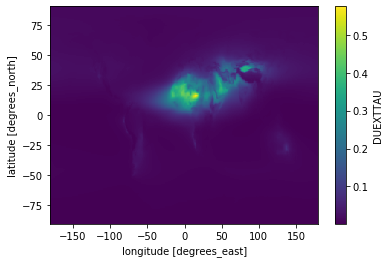

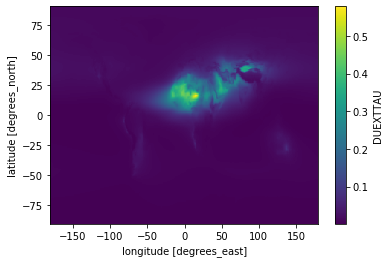

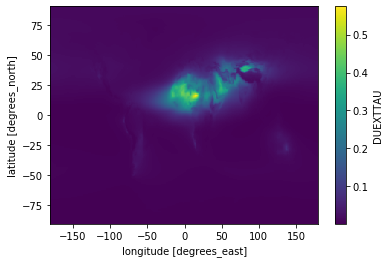

In [27]:
var='DUEXTTAU'
MERRA[var].sel(time=slice('1985','2014')).mean('time').plot()
plt.show()
MERRA[var].sel(time=slice('2003','2019')).mean('time').plot()
plt.show()
MERRA[var].sel(time=slice('2001','2018')).mean('time').plot()
plt.show()
MERRA[var].sel(time=slice('2006-06','2020-05')).mean('time').plot()
plt.show()

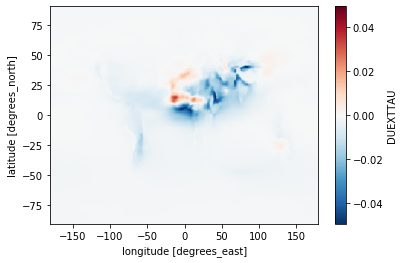

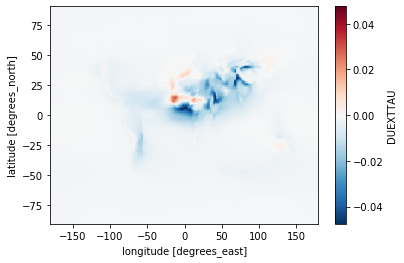

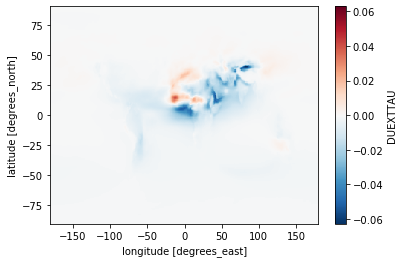

In [28]:
(MERRA[var].sel(time=slice('1985','2014')).mean('time')-MERRA[var].sel(time=slice('2003','2019')).mean('time')).plot()
plt.show()
(MERRA[var].sel(time=slice('1985','2014')).mean('time')-MERRA[var].sel(time=slice('2001','2018')).mean('time')).plot()
plt.show()
(MERRA[var].sel(time=slice('1985','2014')).mean('time')-MERRA[var].sel(time=slice('2006-06','2020-05')).mean('time')).plot()
plt.show()

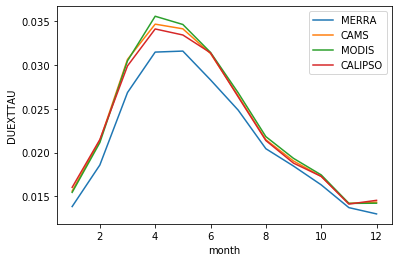

In [32]:
MERRA[var].sel(time=slice('1985','2014')).groupby('time.month').mean('time').mean(['lat','lon']).plot(label='MERRA')
MERRA[var].sel(time=slice('2003','2019')).groupby('time.month').mean('time').mean(['lat','lon']).plot(label='CAMS')
MERRA[var].sel(time=slice('2001','2018')).groupby('time.month').mean('time').mean(['lat','lon']).plot(label='MODIS')
MERRA[var].sel(time=slice('2006-06','2020-05')).groupby('time.month').mean('time').mean(['lat','lon']).plot(label='CALIPSO')
plt.legend()

In [30]:
MERRA[var].sel(time=slice('1985','2014')).groupby('time.season').mean('time').mean(['lat','lon'])

<xarray.DataArray 'DUEXTTAU' (season: 4)>
dask.array<mean_agg-aggregate, shape=(4,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [55]:
import cartopy.io.shapereader as shpreader 
import shapely.geometry as sgeom 
from shapely.ops import unary_union 
from shapely.prepared import prep 

land_shp_fname = shpreader.natural_earth(resolution='50m', 
             category='physical', name='land') 
land_geom = unary_union(list(shpreader.Reader(land_shp_fname).geometries())) 
land = prep(land_geom)

def is_land(x, y): 
    return land.contains(sgeom.Point(x, y))

island=np.ones([181,360], dtype=bool)
for ii,lat in  enumerate(np.arange(-90.,91.,1)):
    for jj,lon in enumerate(np.arange(-180.,180.,1)):
        island[ii,jj] =is_land(lon,lat)
island = xr.DataArray(island, coords=[np.arange(-90.,91.,1), np.arange(-180.,180.,1)], dims=["lat", "lon"])

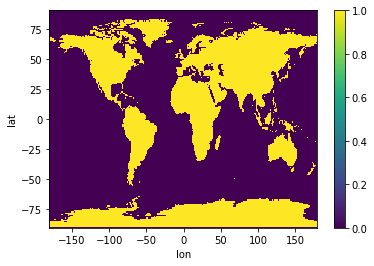

In [174]:
island.plot()